In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [2]:
uac = pd.read_csv("Unemployment and Crime.csv")

In [3]:
uac1 = uac[['Assault', 'Unemploy_Georgia']]

In [4]:
uac1.head()

,Assault,Unemploy_Georgia
0,1736,0.091
1,1328,0.086
2,1685,0.082
3,1709,0.079
4,1867,0.082


## Test Assumptions

In [5]:
uac1.dropna(inplace = True)

<ipython-input-5-1494953dd90a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1.dropna(inplace = True)


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Assault', ylabel='Density'>

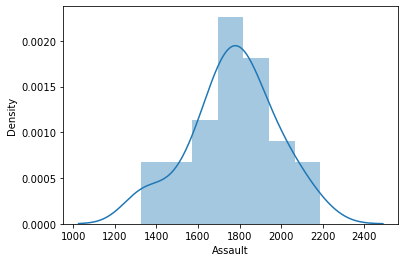

In [6]:
sns.distplot(uac1['Assault'])

In [7]:
uac1['AssaultSQRT'] = np.sqrt(uac1['Assault'])

<ipython-input-7-94a43a0cd903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1['AssaultSQRT'] = np.sqrt(uac1['Assault'])


In [8]:
uac1.head()

,Assault,Unemploy_Georgia,AssaultSQRT
0,1736,0.091,41.665333
1,1328,0.086,36.441734
2,1685,0.082,41.048752
3,1709,0.079,41.340053
4,1867,0.082,43.208795


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AssaultSQRT', ylabel='Density'>

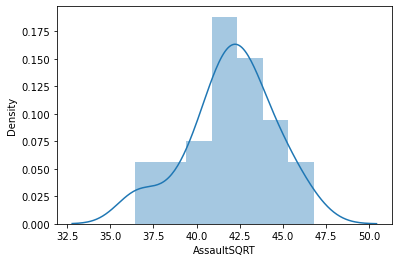

In [9]:
sns.distplot(uac1['AssaultSQRT'])

In [10]:
scipy.stats.bartlett(uac1['AssaultSQRT'], uac1['Unemploy_Georgia'])

BartlettResult(statistic=329.5290868308278, pvalue=1.2171751940153792e-73)

In [11]:
scipy.stats.fligner(uac1['AssaultSQRT'], uac1['Unemploy_Georgia'])

FlignerResult(statistic=44.81047107632404, pvalue=2.1705882542656418e-11)

## Sample Size

In [12]:
uac1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Assault           36 non-null     int64  
 1   Unemploy_Georgia  36 non-null     float64
 2   AssaultSQRT       36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


## Independence

## Analysis

In [13]:
uac1.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [14]:
postHoc = MultiComparison(uac1['AssaultSQRT'], uac1['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 0.054  0.057   1.3584    0.9  -5.9319  8.6488  False
 0.054   0.06   1.8236    0.9  -6.1626  9.8098  False
 0.054  0.061  -0.8011    0.9 -10.5821  8.9799  False
 0.054  0.062   3.7131    0.9  -6.0679 13.4941  False
 0.054  0.063  -2.8123    0.9 -10.7984  5.1739  False
 0.054  0.064   2.4524    0.9  -5.5337 10.4386  False
 0.054  0.066   0.7224    0.9  -7.2638  8.7086  False
 0.054  0.067   1.6438    0.9  -8.1372 11.4249  False
 0.054  0.069   2.2451    0.9  -7.5359 12.0261  False
 0.054  0.072   5.4674 0.6601  -4.3136 15.2484  False
 0.054  0.073  -0.9518    0.9  -8.2422  6.3385  False
 0.054  0.074  -1.9279    0.9  -11.709  7.8531  False
 0.054  0.075   -4.542 0.8665 -14.3231   5.239  False
 0.054  0.076   3.2604    0.9  -4.7257 11.2466  False
 0.054  0.079   0.3303    0.9  -7.6558  8.3165  False
 0.054   0.08   1.7429    0.

In [15]:
uac1.groupby('Unemploy_Georgia').mean()

,Assault,AssaultSQRT
Unemploy_Georgia,,
0.054,1706.000000,41.297987
0.057,1820.666667,42.656401
0.060,1860.500000,43.121580
0.061,1640.000000,40.496913
0.062,2026.000000,45.011110
0.063,1485.000000,38.485731
0.064,1915.000000,43.750431
0.066,1766.000000,42.020391
0.067,1844.000000,42.941821
